In [2]:
import os.path
import re
import sys
import numpy as np
import json
import time
import pandas as pd
import h5py
from tqdm import tnrange, tqdm_notebook
import urllib

%matplotlib inline
%load_ext autoreload
%autoreload 2

## This script will download all of the images from the BM collections


In [4]:
df = pd.read_hdf('/data/captioning/bm_data.h5', 'df')
df

,print.value,url.value,captions,materials,dates,id
0,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,"From the animal legend; antelope to left, anot...",Woodcut,1912,0
1,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Woodblock print. Giant lantern in the Kaminari...,n/a,n/a,1
2,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Woodblock print. Spring night at Ginza.,n/a,n/a,2
3,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Le Mont de Neuville; street winding to right b...,"Charcoal (?), with watercolour, over monotype",1899,3
4,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Monochrome woodblock print. Subodai standing. ...,n/a,n/a,4
5,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Colour woodblock print with powdered mica back...,n/a,n/a,5
6,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Woodblock print. Beauty with unrolled obi?,n/a,n/a,6
7,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,Colour woodblock print with gold leaf and powd...,n/a,n/a,7
8,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,"Illustrated book, orihon , 5 vols . Instructio...",n/a,n/a,8
9,http://collection.britishmuseum.org/id/object/...,http://www.britishmuseum.org/collectionimages/...,"Illustrated book, folding album, 2 vols. Varie...",n/a,n/a,9


In [30]:
# add explicit id and rewrite to file
#df['id'] = df.index
#store = pd.HDFStore('/data/captioning/bm_data.h5')
#store['df'] = df


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2885: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['print.value', 'url.value', 'captions', 'materials', 'dates']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
df_tiny = df.sample(5).copy()
list(df_tiny['url.value'])

[u'http://www.britishmuseum.org/collectionimages/AN00348/AN00348477_001_l.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN00600/AN00600974_001_l.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN01054/AN01054399_001_l.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN00704/AN00704464_001_l.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN01029/AN01029793_001_l.jpg']

In [19]:
# use the medium size image instead of large size image

df['url.value'] = df['url.value'].apply(lambda x: x.replace('_l.jpg', '_m.jpg'))


In [21]:
list(df.head(5)['url.value'])

[u'http://www.britishmuseum.org/collectionimages/AN00107/AN00107870_001_m.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN00489/AN00489936_001_m.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN00244/AN00244222_001_m.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN00266/AN00266509_001_m.jpg',
 u'http://www.britishmuseum.org/collectionimages/AN00225/AN00225242_001_m.jpg']

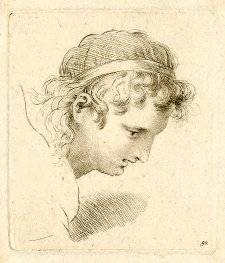

In [22]:
#try downloading 1 image

fn = urllib.urlretrieve(df.sample(1)['url.value'].iloc[0], "test_download_img.jpg")
from IPython.display import Image
Image(filename="test_download_img.jpg") 

In [23]:
import multiprocessing
multiprocessing.cpu_count()

36

In [ ]:
# Do multi-threading download of all images
import multiprocessing
from multiprocessing import Pool

def job(url):
    # url: [<url of img>, <id of img>]
    urllib.urlretrieve(url[0], "/data/captioning/img/" + str(url[1]) + ".jpg")

pool = Pool()

urls = zip(list(df['url.value']), list(df['id']))

for _ in tqdm_notebook(pool.imap_unordered(job, urls), desc="downloaded images"):
    pass



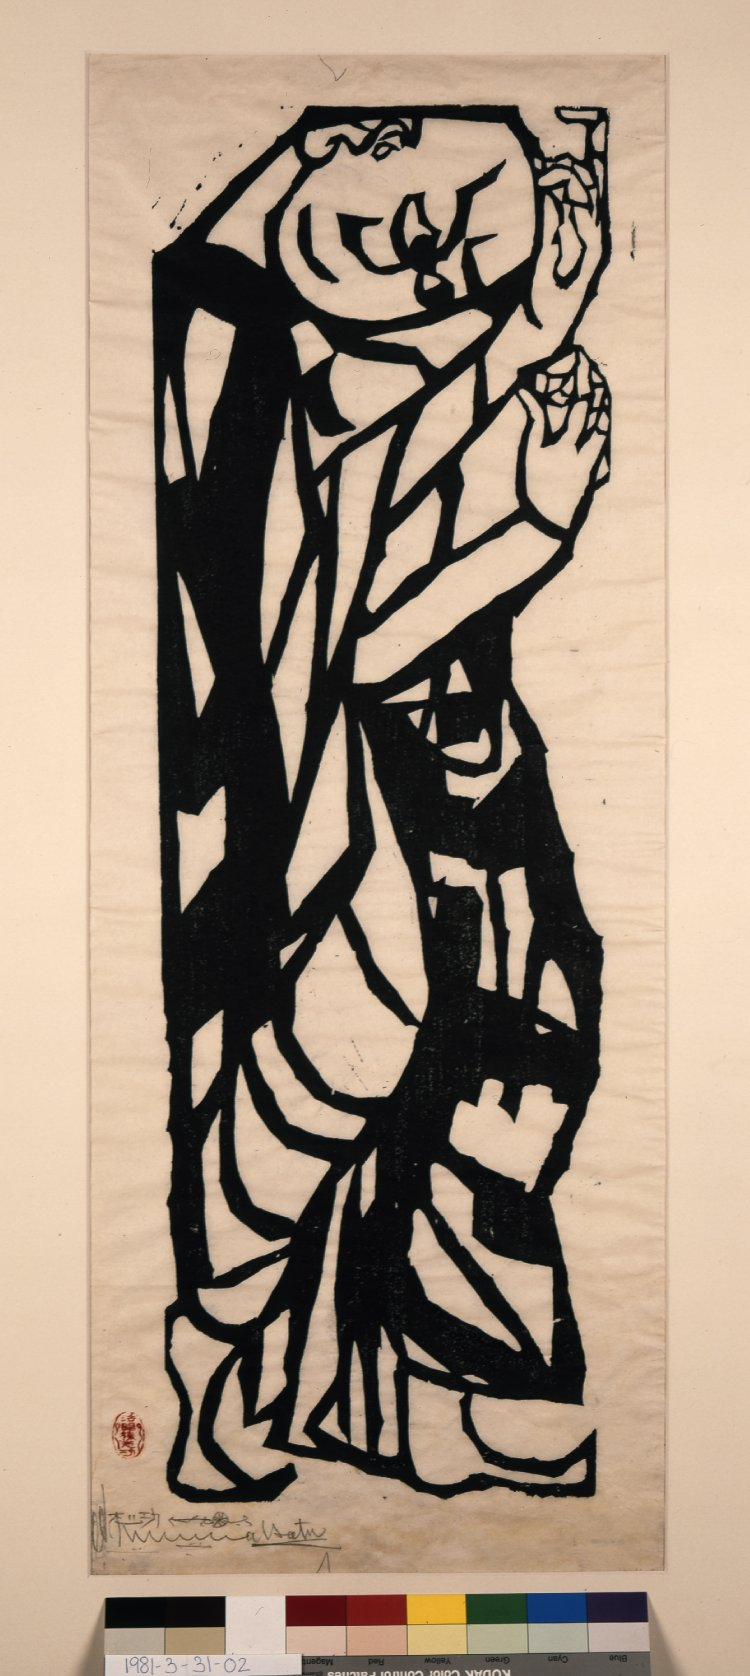

8